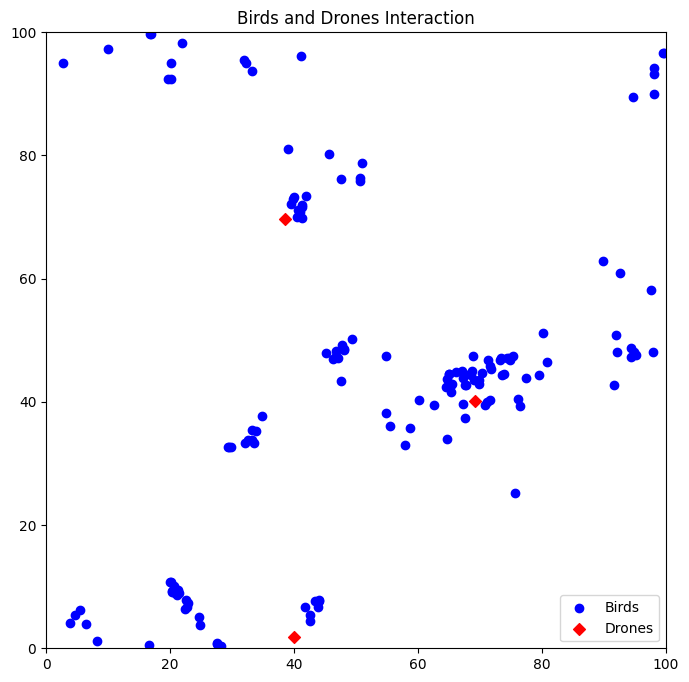

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Parameters for the Vicsek model
N = 150  # number of birds
L = 100  # size of the domain

eta = 0.5  # noise
v = 3  # velocity of birds
dt = 1    # time step
R = 3     # radius of interaction
Nt = 500  # number of time steps

# Parameters for drones
Nd = 3  # number of drones
vd = 3  # constant speed of drones
Rd = 5  # range of influence of drones
# Additional array to keep track of which drone each bird is following
# -1 indicates that the bird is not following any drone
stuck_birds = set()


# Initialize birds
def initialize_birds(N, L):
    x = np.random.rand(N) * L
    y = np.random.rand(N) * L
    theta = np.random.rand(N) * 2 * np.pi
    vx = v * np.cos(theta)
    vy = v * np.sin(theta)
    return x, y, vx, vy, theta

# Initialize drones
def initialize_drones(Nd, L):
    x = np.random.rand(Nd) * L
    y = np.random.rand(Nd) * L
    theta = np.random.rand(Nd) * 2 * np.pi
    vx = vd * np.cos(theta)
    vy = vd * np.sin(theta)
    return x, y, vx, vy

def update(x, y, vx, vy, theta, drone_x, drone_y, drone_vx, drone_vy, Rsq, eta, N, dt, stuck_birds):
    for i in range(N):
        if i not in stuck_birds:
            # Calculate distance to each drone
            dx = drone_x - x[i]
            dy = drone_y - y[i]
            dist_sq = dx**2 + dy**2

            # Check if any drone is within influence range
            within_range = dist_sq < Rd**2
            if np.any(within_range):
                # Attract birds towards the closest drone and match drone speed
                closest_drone = np.argmin(dist_sq)
                stuck_birds.add(i)  # Mark this bird as 'stuck' to a drone
                vx[i] = drone_vx[closest_drone]
                vy[i] = drone_vy[closest_drone]
            else:
                # Vicsek model update
                within_radius = (x - x[i])**2 + (y - y[i])**2 < Rsq
                theta[i] = np.arctan2(vy[within_radius].mean(), vx[within_radius].mean()) + eta * (np.random.rand() - 0.5)
                vx[i] = v * np.cos(theta[i])
                vy[i] = v * np.sin(theta[i])
        else:
            # If the bird is 'stuck', it keeps moving with its assigned drone's velocity
            closest_drone = np.argmin((drone_x - x[i])**2 + (drone_y - y[i])**2)
            vx[i] = drone_vx[closest_drone]
            vy[i] = drone_vy[closest_drone]

    # Update positions
    x += vx * dt
    y += vy * dt

    # Apply periodic boundary conditions
    x = x % L
    y = y % L

    return x, y, vx, vy, stuck_birds


def update_drones(drone_x, drone_y, drone_vx, drone_vy, L, vd, dt):
    # Move drones straight ahead
    drone_x += drone_vx * dt
    drone_y += drone_vy * dt

    # Check for proximity and pass each other without changing direction
    for i in range(Nd):
        for j in range(i + 1, Nd):
            dx = drone_x[i] - drone_x[j]
            dy = drone_y[i] - drone_y[j]
            dist = np.sqrt(dx**2 + dy**2)
            if dist < Rd:  # If drones are too close
                # Adjust their positions slightly to avoid overlap without changing direction
                drone_x[i] += drone_vx[i] * dt
                drone_y[i] += drone_vy[i] * dt
                drone_x[j] += drone_vx[j] * dt
                drone_y[j] += drone_vy[j] * dt

    # Apply periodic boundary conditions
    drone_x = drone_x % L
    drone_y = drone_y % L

    return drone_x, drone_y, drone_vx, drone_vy







# Visualization function
def visualize(x, y, drone_x, drone_y):
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y, c='blue', label='Birds')
    plt.scatter(drone_x, drone_y, c='red', marker='D', label='Drones')
    plt.xlim(0, L)
    plt.ylim(0, L)
    plt.title("Birds and Drones Interaction")
    plt.legend()
    plt.show()

# Simulation
x, y, vx, vy, theta = initialize_birds(N, L)
drone_x, drone_y, drone_vx, drone_vy = initialize_drones(Nd, L)

for _ in range(Nt):
    drone_x, drone_y, drone_vx, drone_vy = update_drones(drone_x, drone_y, drone_vx, drone_vy, L, vd, dt)
    x, y, vx, vy, stuck_birds = update(x, y, vx, vy, theta, drone_x, drone_y, drone_vx, drone_vy, R**2, eta, N, dt, stuck_birds)
    visualize(x, y, drone_x, drone_y)
    clear_output(wait=True)



